# Operations on image feature vectors


Because word embeddings and image features are very computionally expensive to train, most ML practitioners will load a pre-trained set of embeddings. In this example we are using Resnet50.

In this notebook you can see how to extract the pre-trained visual features for the images used in the assignment.

We will learn more about this topic in the AI Cognitive systems course.

In [1]:
# we are going to load images first using Pillow package from Python
# PIL is the Python Imaging Library 
!pip install Pillow 
from PIL import Image
image = Image.open('banana.jpg')

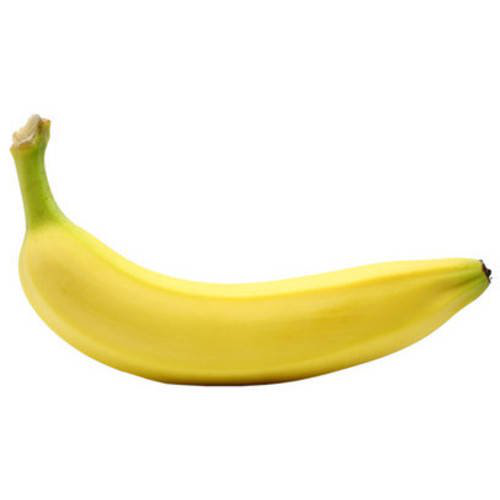

In [2]:
image

In [3]:
# Add images to image_set
image_set = ['car.jpg', 'dog.jpg', 'banana.jpg', 'delicious.jpg', 'baguette.jpg',
            'jumping.jpg', 'hugging.jpg', 'election.jpg']

In [4]:
!pip install torch torchvision torchaudio
import torchvision.transforms as transforms
import torch
import os

In [5]:
# transform images to same size(when you're feeding image to model, they should have same size.)
# (256, 256) is the standard size for training ResNet50
transform = transforms.Compose(
        [
            transforms.Resize((256, 256)),
            #transforms.RandomCrop((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ]
    )

In [9]:
# shape of tensor for image_set
# 5 images, 3-Dimensinal(RGB), (256, 256) image matrix
test_loader = torch.Tensor(8, 3, 256, 256)
# load images to test_loader
for num, img in enumerate(image_set):
    image_id = img.split('/')[-1]
    print(img)
    
    img = Image.open(img).convert('RGB')
    img = transform(img)
    test_loader[num, :, :, :] = img

car.jpg
dog.jpg
banana.jpg
delicious.jpg
baguette.jpg
jumping.jpg
hugging.jpg
election.jpg


In [10]:
#Show test_image shape
test_loader.shape

torch.Size([8, 3, 256, 256])

In [11]:
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torchvision

class Encoder(nn.Module):
    '''
    encoder module
    - use pre-trained encoder: ResNet50 trained on ImageNet classification task
    '''

    def __init__(self, encoded_image_size=14):
        super(Encoder, self).__init__()
        self.enc_image_size = encoded_image_size
        
        resnet = torchvision.models.resnet50(pretrained=True)
        modules = list(resnet.children())[:-2]
        
        self.resnet = nn.Sequential(*modules)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))

    def forward(self, images):
        '''
        Forward propagation.
        :param images: images, a tensor of dimensions (batch_size, 3, image_size, image_size)
        :return: encoded images
        '''
        out = self.resnet(images)
        out = self.adaptive_pool(out)
        out = out.permute(0, 2, 3, 1)
        # max pooling
        out = out.max(1).values.max(1).values
        print(out)
        return out

In [12]:
encoder = Encoder()

In [13]:
# Show image features
image_features = encoder(test_loader)
image_features.shape

tensor([[1.0269, 0.6498, 1.0401,  ..., 0.4694, 0.2149, 0.7966],
        [1.5042, 1.9378, 1.0848,  ..., 2.4570, 0.8196, 1.4321],
        [5.1187, 2.7023, 3.9210,  ..., 3.2251, 6.2990, 3.3702],
        ...,
        [1.8299, 3.2628, 1.8091,  ..., 1.3000, 0.4612, 0.9397],
        [1.3873, 2.2413, 4.1314,  ..., 1.4334, 1.5370, 1.8800],
        [2.1811, 5.3159, 4.2956,  ..., 0.7739, 1.2759, 1.0446]],
       grad_fn=<MaxBackward0>)


torch.Size([8, 2048])

In [14]:
# Split image_features
#all_images = image_features
#banana_image, apple_image, chair_image, dog_image, baguette_image = all_images[0], all_images[1], all_images[2], all_images[3], all_images[4]
#print(apple_image.shape)

In [16]:
import numpy as np
torch.save(image_features, 'image_features.pt')
#np.savez('image_features.npz', all_images)

In [20]:
!pip install pandas
import pandas as pd
import csv

# Load glove embedding vectores
glove_data_file = './glovebB/glove.6B.300d.txt'
# Read words embedding
words = pd.read_table(glove_data_file, sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [21]:
words.shape

(400001, 300)

In [ ]:
some_words = ['car', 'dog', 'banana', 'delicious', 'baguette', 'jumping', 'hugging', 'election']

In [22]:
import torch
# Convert word embedding vector to tennor
car_vector = torch.Tensor(words.loc['car'].tolist()).unsqueeze(0)
dog_vector = torch.Tensor(words.loc['dog'].tolist()).unsqueeze(0)
banana_vector = torch.Tensor(words.loc['banana'].tolist()).unsqueeze(0)
delicious_vector = torch.Tensor(words.loc['delicious'].tolist()).unsqueeze(0)
baguette_vector = torch.Tensor(words.loc['baguette'].tolist()).unsqueeze(0)
jumping_vector = torch.Tensor(words.loc['jumping'].tolist()).unsqueeze(0)
hugging_vector = torch.Tensor(words.loc['hugging'].tolist()).unsqueeze(0)
election_vector = torch.Tensor(words.loc['election'].tolist()).unsqueeze(0)

In [23]:
import numpy as np
embedding_vectors = np.concatenate([car_vector, dog_vector, banana_vector,
                                    delicious_vector, baguette_vector, jumping_vector,
                                    hugging_vector, election_vector])
embedding_vectors.shape

(8, 300)

In [24]:
import torch
np.savez('text_feature.npz', embedding_vectors)